In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
assessment_df=pd.read_csv('/content/drive/MyDrive/studentdataset/assessments.csv')
courses_df=pd.read_csv('/content/drive/MyDrive/studentdataset/courses.csv')
studentAssessment_df=pd.read_csv('/content/drive/MyDrive/studentdataset/studentAssessment.csv')
studentInfo_df=pd.read_csv('/content/drive/MyDrive/studentdataset/studentInfo.csv')
studentInfo_df1=pd.read_csv('/content/drive/MyDrive/studentdataset/studentInfo.csv')
studentRegistration_df=pd.read_csv('/content/drive/MyDrive/studentdataset/studentRegistration.csv')
studentVle_df=pd.read_csv('/content/drive/MyDrive/studentdataset/studentVle.csv')
vle_df=pd.read_csv('/content/drive/MyDrive/studentdataset/vle.csv')

In [8]:

#for plotting
def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

In [9]:
def specificity(tn,fp,fn,tp):
    return tn/(tn+fp)

def sensitivity(tn,fp,fn,tp):
    return tp/(fn+tp)


In [10]:
assessment_df.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [11]:
assessment_df['date'] = assessment_df['date'].fillna(int(assessment_df['date'].astype(float).mean()))

In [12]:
studentAssessment_df.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [13]:
studentAssessment_df = studentAssessment_df.dropna()

In [14]:
studentRegistration_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [15]:
studentRegistration_df['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in studentRegistration_df['date_unregistration']]
studentRegistration_df['date_registration']   = studentRegistration_df['date_registration'].fillna(0).astype(float).apply(abs)

In [16]:
studentInfo_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [17]:
studentInfo_df['imd_band'] = studentInfo_df['imd_band'].fillna(studentInfo_df['imd_band'].mode()[0])
studentInfo_df1['imd_band'] = studentInfo_df1['imd_band'].fillna(studentInfo_df1['imd_band'].mode()[0])

In [18]:
studentVle_df.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [19]:
vle_df.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [20]:
vle_df = vle_df.drop(['week_from', 'week_to'], axis = 1)

In [21]:
studentInfo_df.drop(['id_student'],axis=1,inplace=True)
studentInfo_df.drop(['imd_band'],axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(studentInfo_df['code_module'])
label1=le.fit_transform(studentInfo_df['code_presentation'])
label2=le.fit_transform(studentInfo_df['gender'])
label3=le.fit_transform(studentInfo_df['region'])
label4=le.fit_transform(studentInfo_df['highest_education'])
#label5=le.fit_transform(studentInfo_df['imd_band'])
label6=le.fit_transform(studentInfo_df['age_band'])
#label7=le.fit_transform(studentInfo_df['num_of_prev_attempts'])
#label8=le.fit_transform(studentInfo_df['studied_credits'])
label9=le.fit_transform(studentInfo_df['disability'])
label10=le.fit_transform(studentInfo_df['final_result'])
studentInfo_df['code_module']=label
studentInfo_df['code_presentation']=label1
studentInfo_df['gender']=label2
studentInfo_df['region']=label3
studentInfo_df['highest_education']=label4
#studentInfo_df['imd_band']=label5
studentInfo_df['age_band']=label6
#studentInfo_df['num_of_prev_attempts']=label7
#studentInfo_df['studied_credits']=label8
studentInfo_df['disability']=label9
studentInfo_df['final_result']=label10
studentInfo_df.head(20)

,code_module,code_presentation,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,1,1,0,1,2,0,240,0,2
1,0,1,0,6,1,1,0,60,0,2
2,0,1,0,5,0,1,0,60,1,3
3,0,1,0,7,0,1,0,60,0,2
4,0,1,0,11,2,0,0,60,0,2
5,0,1,1,10,0,1,0,60,0,2
6,0,1,1,6,1,0,0,60,0,2
7,0,1,0,5,0,0,0,120,0,2
8,0,1,0,0,0,0,0,90,0,2
9,0,1,1,4,4,2,0,60,0,2


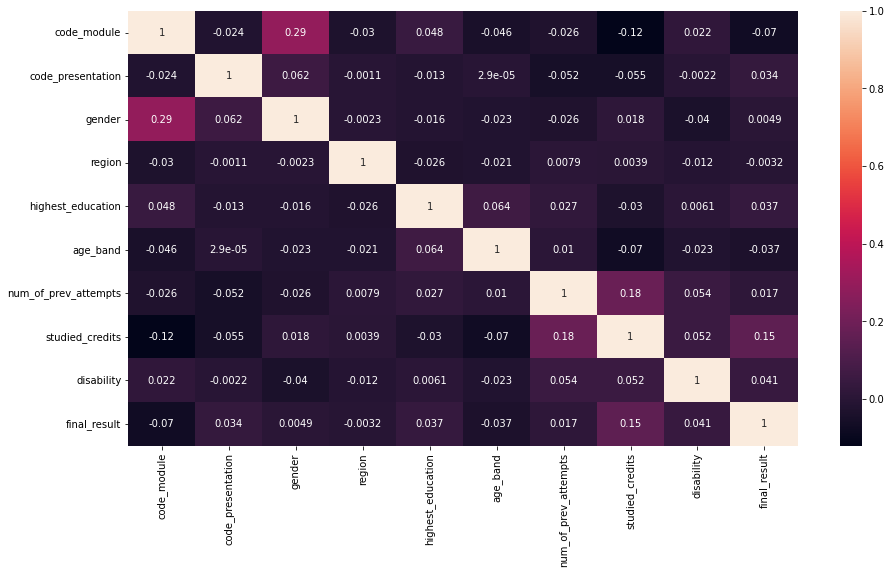

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(studentInfo_df.corr(),annot=True)
plt.show()

In [24]:
X=studentInfo_df.loc[:,"code_module":"disability":1]
#print(X)
target_names=["Distinction","Fail","Pass","Withdrawn"]
Y=studentInfo_df["final_result"]
print(Y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

0        2
1        2
2        3
3        2
4        2
        ..
32588    1
32589    0
32590    2
32591    3
32592    0
Name: final_result, Length: 32593, dtype: int64


In [25]:
model_svm=SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)


In [26]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.0000    0.0000    0.0000       605
        Fail     0.0000    0.0000    0.0000      1411
        Pass     0.4164    0.7087    0.5246      2472
   Withdrawn     0.4074    0.4638    0.4338      2031

    accuracy                         0.4133      6519
   macro avg     0.2060    0.2931    0.2396      6519
weighted avg     0.2849    0.4133    0.3341      6519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model_rfc=RFC()
model_rfc.fit(x_train,y_train)
y_pred = model_rfc.predict(x_test)


In [28]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.1831    0.1041    0.1328       605
        Fail     0.2664    0.2069    0.2329      1411
        Pass     0.4299    0.5174    0.4696      2472
   Withdrawn     0.4106    0.4254    0.4179      2031

    accuracy                         0.3832      6519
   macro avg     0.3225    0.3135    0.3133      6519
weighted avg     0.3656    0.3832    0.3710      6519



In [29]:
model_knn=KNN()
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)


In [30]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.1593    0.1256    0.1405       605
        Fail     0.2517    0.2693    0.2602      1411
        Pass     0.4246    0.4976    0.4582      2472
   Withdrawn     0.4226    0.3402    0.3770      2031

    accuracy                         0.3646      6519
   macro avg     0.3145    0.3082    0.3090      6519
weighted avg     0.3619    0.3646    0.3605      6519



In [31]:
model_etc=ETC()
model_etc.fit(x_train,y_train)
y_pred = model_etc.predict(x_test)


In [32]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.1676    0.1438    0.1548       605
        Fail     0.2493    0.2403    0.2447      1411
        Pass     0.4276    0.5020    0.4619      2472
   Withdrawn     0.4085    0.3496    0.3768      2031

    accuracy                         0.3646      6519
   macro avg     0.3133    0.3089    0.3095      6519
weighted avg     0.3589    0.3646    0.3598      6519



In [33]:
model_abc=ABC()
model_abc.fit(x_train,y_train)
y_pred = model_abc.predict(x_test)


In [34]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.5000    0.0099    0.0194       605
        Fail     0.4118    0.0843    0.1400      1411
        Pass     0.4422    0.7350    0.5522      2472
   Withdrawn     0.4547    0.4722    0.4633      2031

    accuracy                         0.4450      6519
   macro avg     0.4522    0.3254    0.2937      6519
weighted avg     0.4449    0.4450    0.3858      6519



In [35]:
model_gbc=GBC()                                                   
model_gbc.fit(x_train,y_train)
y_pred = model_gbc.predict(x_test)


In [36]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.6923    0.0149    0.0291       605
        Fail     0.4022    0.1021    0.1628      1411
        Pass     0.4415    0.7217    0.5478      2472
   Withdrawn     0.4604    0.4776    0.4688      2031

    accuracy                         0.4459      6519
   macro avg     0.4991    0.3291    0.3021      6519
weighted avg     0.4621    0.4459    0.3917      6519



In [37]:
##merging 

In [38]:
student_vle_merge_vle = studentVle_df.merge(vle_df, on=['id_site', 'code_module', 'code_presentation'],how = 'left')

In [39]:
student_vle_merge_vle[(student_vle_merge_vle['id_student']==28400) & (student_vle_merge_vle['date']<0)].head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
5,AAA,2013J,28400,546652,-10,8,forumng
6,AAA,2013J,28400,546876,-10,2,subpage
7,AAA,2013J,28400,546688,-10,15,oucontent
8,AAA,2013J,28400,546662,-10,17,oucontent
9,AAA,2013J,28400,546890,-10,1,url


In [40]:
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]

In [41]:
student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] =='After',student_vle_merge_vle['sum_click'], 0)
student_vle_merge_vle['Before_Clicks']= np.where(student_vle_merge_vle['Click_Timing'] =='Before',student_vle_merge_vle['sum_click'], 0)

In [42]:
student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'],as_index=False)['sum_click', 'After_Clicks', 'Before_Clicks'].sum()

<ipython-input-42-5519fb216484>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'],as_index=False)['sum_click', 'After_Clicks', 'Before_Clicks'].sum()


In [43]:
student_vle_merge_vle_group.isnull().sum()

code_module          0
code_presentation    0
id_student           0
sum_click            0
After_Clicks         0
Before_Clicks        0
dtype: int64

In [44]:
student_vle_merge_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1


In [45]:
##merge studentRegistration table with the courses table to understand the related between registrations and length of course

In [46]:
student_registration_merge_courses = studentRegistration_df.merge(courses_df,on = ['code_module', 'code_presentation'],how = 'left')

In [47]:
student_registration_merge_courses['Year'] = student_registration_merge_courses['code_presentation'].str[0:4]
student_registration_merge_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October' for code in student_registration_merge_courses['code_presentation']]

In [48]:
student_registration_merge_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,159.0,0,268,2013,October
1,AAA,2013J,28400,53.0,0,268,2013,October
2,AAA,2013J,30268,92.0,1,268,2013,October
3,AAA,2013J,31604,52.0,0,268,2013,October
4,AAA,2013J,32885,176.0,0,268,2013,October
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269,2014,October
32589,GGG,2014J,2645731,23.0,0,269,2014,October
32590,GGG,2014J,2648187,129.0,0,269,2014,October
32591,GGG,2014J,2679821,49.0,1,269,2014,October


In [49]:
#course length doesn't have much difference for the student who withdrawn and students who completed the course
student_registration_merge_courses.groupby('date_unregistration', as_index=False)['module_presentation_length'].mean()

,date_unregistration,module_presentation_length
0,0,256.095378
1,1,255.819500


In [50]:
#merge assessments Table with the studentAssessment Table to understand the relationship between assessment and student performance

In [51]:
student_assessment_merge_assessment = studentAssessment_df.merge(assessment_df,on = ['id_assessment'], how='left' )

In [52]:
## we can check whether their was a late submission or not (0 : Late, 1:OnTime)
student_assessment_merge_assessment['Late_submission'] = ['0' if int(student_assessment_merge_assessment['date_submitted'].iloc[i]) > int(student_assessment_merge_assessment['date'].iloc[i]) else '1' 
                                                         for i in range(len(student_assessment_merge_assessment))]

In [53]:
print('Percentage of Late Submissions From Students are : ')
print((len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission']=='0'])/len(student_assessment_merge_assessment)*100))
print('We can see that approximately 30 percent of students submitted their assigments late')

Percentage of Late Submissions From Students are : 
29.958155624240963
We can see that approximately 30 percent of students submitted their assigments late


Late_submission          0          1
assessment_type                      
CMA              46.777830  53.222170
Exam             57.914902  42.085098
TMA              16.473797  83.526203


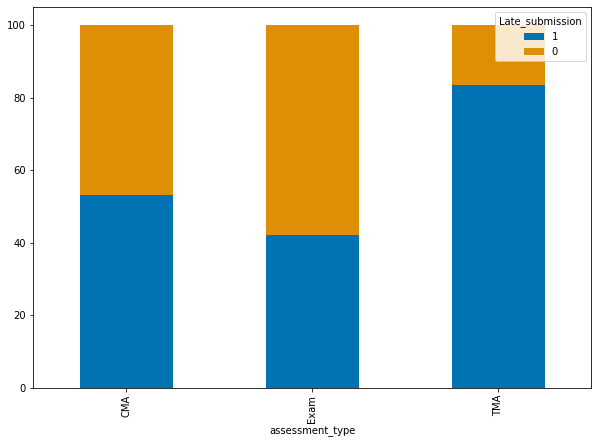

In [54]:
#There are three types of assessments :- Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA), Exams
# Following Plot Shows us the Percentage of Late Submission by Assessment_Type
stacked_plot(student_assessment_merge_assessment, 'assessment_type', 'Late_submission', 'id_student', plot_size=(10, 7))

Late_submission          0          1
code_module                          
AAA              25.810553  74.189447
BBB              47.472021  52.527979
CCC              69.063342  30.936658
DDD              30.566283  69.433717
EEE              14.544763  85.455237
FFF              10.345268  89.654732
GGG              10.049293  89.950707


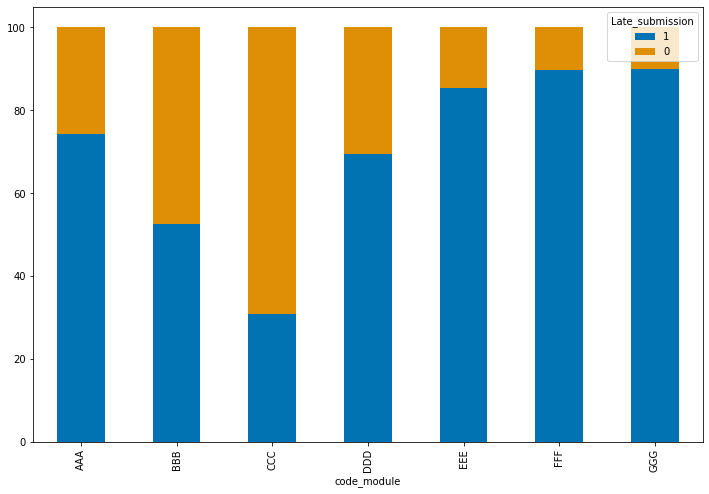

In [55]:
# There are 7 course modules. 4 are from STEM and 3 from Social Sciences
# Social Sciences :- AAA, BBB, GGG
# STEM :- CCC, DDD, EEE, FFF
stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

In [56]:
student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if student_assessment_merge_assessment['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for i in range(len(student_assessment_merge_assessment))]

In [57]:
# As from the description of table we know that score less than 40 is considered as Fail and above that is pass


student_assessment_merge_assessment['Result'] = ['Fail' if int(student_assessment_merge_assessment['score'].iloc[i]) < 40
                                                        else 'Pass' for i in range(len(student_assessment_merge_assessment))]

In [58]:
## Weightage of Assignment can have impact on the submissions and Result of students.categorized the weight into Low, Medium and High Weightage.

print(student_assessment_merge_assessment['weight'].unique())

percentage_segment = []

for percent in student_assessment_merge_assessment['weight']:
    if percent <= 10:
        percentage_segment.append('Low_Weightage')
    elif percent > 10 and percent <= 30:
        percentage_segment.append('Medium_Weightage')
    else:
        percentage_segment.append('High_Weightage')
        
student_assessment_merge_assessment['Weigthage'] = percentage_segment

[ 10.   20.   30.    5.   18.    1.    0.   35.    9.   22.    2.    7.
   8.  100.    7.5  12.5  15.    3.    4.    6.   17.5  25.   16.   28. ]


In [59]:
#MERGING VLE DATA WITH THE STUDENT INFO DATA

In [60]:
student_info = studentInfo_df1.merge(student_vle_merge_vle_group, 
                                        on = ['code_module', 'code_presentation', 'id_student'],
                                        how = 'left')

student_info['sum_click']     = student_info['sum_click'].fillna(student_info['sum_click'].mean())
student_info['After_Clicks']  = student_info['After_Clicks'].fillna(student_info['After_Clicks'].mean())
student_info['Before_Clicks'] = student_info['Before_Clicks'].fillna(student_info['Before_Clicks'].mean())

In [61]:
student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]

In [62]:
#Combining Student Info with the Student Registration Table

In [63]:
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis = 1)

In [64]:
student_info = student_info.merge(student_registration_merge_courses,on = ['code_module', 'code_presentation', 'id_student'],how = 'left')

In [65]:
student_info['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in student_info['num_of_prev_attempts']]

In [66]:
student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']else 'STEM' for i in range(len(student_info))]

In [67]:
# In this step, I will remove code_module, code_presentation, id_student and Year as those won't have impact on the result 

student_info = student_info.drop(['code_presentation', 'id_student', 'Year'], axis = 1)


In [68]:
student_info['date_registration'] = student_info['date_registration'].astype(float)


In [69]:
student_info['date_registration'].describe()

count    32593.000000
mean        69.492437
std         49.044122
min          0.000000
25%         29.000000
50%         57.000000
75%        100.000000
max        322.000000
Name: date_registration, dtype: float64

In [70]:
student_info.head()

,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,module_presentation_length,Starting_Month,Code_Category
0,AAA,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,159.0,268,October,Social_Science
1,AAA,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,53.0,268,October,Social_Science
2,AAA,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,92.0,268,October,Social_Science
3,AAA,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,52.0,268,October,Social_Science
4,AAA,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,176.0,268,October,Social_Science


In [71]:
def categorical_encoding(df, column_name_list=[]):
    
    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix = column_name, 
                                             prefix_sep = '_', drop_first = False)
        df = pd.concat([df, categorical_columns], axis = 1)
        df = df.drop(column_name, axis = 1)
    return df
#to label
def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data

In [72]:
# There are two types of categorical variables in the data.
# 1. NOMINAL :- Here there is no order in the categories
# 2. ORDINAL :- When there is order in the category

nominal_columns = ['gender', 'region', 'disability', 'Starting_Month', 'code_module', 'Code_Category']
ordinal_columns = ['highest_education', 'imd_band', 'age_band']

In [73]:
data = labelEncoder(student_info, ordinal_columns)
data = categorical_encoding(student_info, nominal_columns)

['M' 'F']
['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['N' 'Y']
['October' 'February']
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['Social_Science' 'STEM']


In [74]:
data.head()

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,...,Starting_Month_October,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,Code_Category_STEM,Code_Category_Social_Science
0,1,9,2,0,240,Pass,934.0,836.0,98.0,159.0,...,1,1,0,0,0,0,0,0,0,1
1,1,2,1,0,60,Pass,1435.0,1220.0,215.0,53.0,...,1,1,0,0,0,0,0,0,0,1
2,0,3,1,0,60,Withdrawn,281.0,179.0,102.0,92.0,...,1,1,0,0,0,0,0,0,0,1
3,0,5,1,0,60,Pass,2158.0,1989.0,169.0,52.0,...,1,1,0,0,0,0,0,0,0,1
4,0,5,0,0,60,Pass,1034.0,739.0,295.0,176.0,...,1,1,0,0,0,0,0,0,0,1


In [75]:
temp_df=data
X=temp_df.drop(['final_result'],axis=1)
target_names=["Distinction","Fail","Pass","Withdrawn"]
Y=data["final_result"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [76]:
model_svm=SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)


In [77]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.0000    0.0000    0.0000       605
        Fail     0.3371    0.0418    0.0744      1411
        Pass     0.5365    0.8212    0.6490      2472
   Withdrawn     0.5344    0.6736    0.5959      2031

    accuracy                         0.5303      6519
   macro avg     0.3520    0.3841    0.3298      6519
weighted avg     0.4429    0.5303    0.4479      6519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
model_knn=KNN()
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)


In [79]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))


              precision    recall  f1-score   support

 Distinction     0.1904    0.1372    0.1595       605
        Fail     0.3286    0.3118    0.3200      1411
        Pass     0.5755    0.6768    0.6220      2472
   Withdrawn     0.6592    0.5963    0.6262      2031

    accuracy                         0.5226      6519
   macro avg     0.4384    0.4305    0.4319      6519
weighted avg     0.5124    0.5226    0.5150      6519



In [80]:
model_etc=ETC()
model_etc.fit(x_train,y_train)
y_pred = model_etc.predict(x_test)


In [81]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.3190    0.1107    0.1644       605
        Fail     0.4134    0.2807    0.3343      1411
        Pass     0.6153    0.7985    0.6951      2472
   Withdrawn     0.6482    0.6839    0.6655      2031

    accuracy                         0.5869      6519
   macro avg     0.4990    0.4685    0.4648      6519
weighted avg     0.5543    0.5869    0.5585      6519



In [82]:
model_abc=ABC()
model_abc.fit(x_train,y_train)
y_pred = model_abc.predict(x_test)


In [83]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))


              precision    recall  f1-score   support

 Distinction     0.4057    0.0711    0.1210       605
        Fail     0.4485    0.2438    0.3159      1411
        Pass     0.6131    0.8839    0.7240      2472
   Withdrawn     0.7008    0.7184    0.7095      2031

    accuracy                         0.6183      6519
   macro avg     0.5420    0.4793    0.4676      6519
weighted avg     0.5855    0.6183    0.5752      6519



In [84]:
model_gbc=GBC()                                                   
model_gbc.fit(x_train,y_train)
y_pred = model_gbc.predict(x_test)


In [85]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))


              precision    recall  f1-score   support

 Distinction     0.5507    0.0628    0.1128       605
        Fail     0.5026    0.2736    0.3543      1411
        Pass     0.6206    0.9118    0.7385      2472
   Withdrawn     0.7210    0.7277    0.7243      2031

    accuracy                         0.6375      6519
   macro avg     0.5987    0.4940    0.4825      6519
weighted avg     0.6198    0.6375    0.5929      6519



In [86]:
model_rfc=RFC()
model_rfc.fit(x_train,y_train)
y_pred = model_rfc.predict(x_test)


In [87]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))



              precision    recall  f1-score   support

 Distinction     0.4297    0.0909    0.1501       605
        Fail     0.4881    0.2757    0.3524      1411
        Pass     0.6255    0.8851    0.7330      2472
   Withdrawn     0.7032    0.7258    0.7143      2031

    accuracy                         0.6299      6519
   macro avg     0.5616    0.4944    0.4874      6519
weighted avg     0.6018    0.6299    0.5907      6519



In [88]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes=(15,))
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)

In [89]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))


              precision    recall  f1-score   support

 Distinction     0.0000    0.0000    0.0000       605
        Fail     0.5240    0.1779    0.2656      1411
        Pass     0.4762    0.9745    0.6398      2472
   Withdrawn     0.6926    0.3328    0.4496      2031

    accuracy                         0.5117      6519
   macro avg     0.4232    0.3713    0.3387      6519
weighted avg     0.5098    0.5117    0.4402      6519



In [90]:
data2=data[data['final_result']=='Withdrawn']
data1 = data.drop(data2.index, axis=0)
data1.head(20)

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,...,Starting_Month_October,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,Code_Category_STEM,Code_Category_Social_Science
0,1,9,2,0,240,Pass,934.0,836.0,98.0,159.0,...,1,1,0,0,0,0,0,0,0,1
1,1,2,1,0,60,Pass,1435.0,1220.0,215.0,53.0,...,1,1,0,0,0,0,0,0,0,1
3,0,5,1,0,60,Pass,2158.0,1989.0,169.0,52.0,...,1,1,0,0,0,0,0,0,0,1
4,0,5,0,0,60,Pass,1034.0,739.0,295.0,176.0,...,1,1,0,0,0,0,0,0,0,1
5,0,8,1,0,60,Pass,2445.0,2168.0,277.0,110.0,...,1,1,0,0,0,0,0,0,0,1
6,1,3,0,0,60,Pass,1492.0,1312.0,180.0,67.0,...,1,1,0,0,0,0,0,0,0,1
7,0,9,0,0,120,Pass,1428.0,1407.0,21.0,29.0,...,1,1,0,0,0,0,0,0,0,1
8,0,7,0,0,90,Pass,1894.0,1888.0,6.0,33.0,...,1,1,0,0,0,0,0,0,0,1
9,1,2,2,0,60,Pass,3158.0,2982.0,176.0,179.0,...,1,1,0,0,0,0,0,0,0,1
10,0,7,1,0,60,Pass,1319.0,1180.0,139.0,103.0,...,1,1,0,0,0,0,0,0,0,1


In [91]:
#feature engineering:First case,assuming Withdrawn Class as Fail and building a model whether student will pass or fail.

In [92]:
data['Result']  = [0 if result in ['Pass', 'Distinction'] else 1 for result in data['final_result']]
feature = data.drop(['final_result', 'Result'], axis = 1)
target  = data['Result']

In [93]:
target_names=["Pass","Fail"]
x_train, x_test, y_train, y_test = train_test_split(feature, target,test_size = 0.2,random_state = 123,stratify=data.final_result)

In [117]:

model_svm=SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
sa=accuracy_score(y_test,y_pred)
sp=precision_score(y_test,y_pred)
sr=recall_score(y_test,y_pred)
sf=f1_score(y_test,y_pred)
print(sa)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


0.7320141125939561


In [97]:

print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.7063    0.7400    0.7227      3077
        Fail     0.7572    0.7249    0.7407      3442

    accuracy                         0.7320      6519
   macro avg     0.7317    0.7324    0.7317      6519
weighted avg     0.7332    0.7320    0.7322      6519

Sensitivity: 0.7248692620569437
Specificity: 0.7400064998375041


In [118]:

model_knn=KNN()
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)
ka=accuracy_score(y_test,y_pred)
kp=precision_score(y_test,y_pred)
kr=recall_score(y_test,y_pred)
kf=f1_score(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [102]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.8137    0.8999    0.8546      3077
        Fail     0.9012    0.8158    0.8564      3442

    accuracy                         0.8555      6519
   macro avg     0.8574    0.8579    0.8555      6519
weighted avg     0.8599    0.8555    0.8555      6519

Sensitivity: 0.8158047646717025
Specificity: 0.8999025024374391


In [119]:
model_etc=ETC()
model_etc.fit(x_train,y_train)
y_pred = model_etc.predict(x_test)
ea=accuracy_score(y_test,y_pred)
ep=precision_score(y_test,y_pred)
er=recall_score(y_test,y_pred)
ef=f1_score(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [104]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.8098    0.8274    0.8185      3077
        Fail     0.8427    0.8263    0.8344      3442

    accuracy                         0.8268      6519
   macro avg     0.8262    0.8268    0.8265      6519
weighted avg     0.8272    0.8268    0.8269      6519

Sensitivity: 0.8262638001162115
Specificity: 0.8274293142671433


In [120]:
model_abc=ABC()
model_abc.fit(x_train,y_train)
y_pred = model_abc.predict(x_test)
aa=accuracy_score(y_test,y_pred)
ap=precision_score(y_test,y_pred)
ar=recall_score(y_test,y_pred)
af=f1_score(y_test,y_pred)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [106]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.8213    0.8664    0.8433      3077
        Fail     0.8744    0.8315    0.8524      3442

    accuracy                         0.8480      6519
   macro avg     0.8479    0.8490    0.8478      6519
weighted avg     0.8494    0.8480    0.8481      6519

Sensitivity: 0.831493317838466
Specificity: 0.8664283392915177


In [121]:
model_gbc=GBC()                                                   
model_gbc.fit(x_train,y_train)
y_pred = model_gbc.predict(x_test)
ga=accuracy_score(y_test,y_pred)
gp=precision_score(y_test,y_pred)
gr=recall_score(y_test,y_pred)
gf=f1_score(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [108]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.8137    0.8999    0.8546      3077
        Fail     0.9012    0.8158    0.8564      3442

    accuracy                         0.8555      6519
   macro avg     0.8574    0.8579    0.8555      6519
weighted avg     0.8599    0.8555    0.8555      6519

Sensitivity: 0.8158047646717025
Specificity: 0.8999025024374391


In [122]:
model_rfc=RFC()
model_rfc.fit(x_train,y_train)
y_pred = model_rfc.predict(x_test)
ra=accuracy_score(y_test,y_pred)
rp=precision_score(y_test,y_pred)
rr=recall_score(y_test,y_pred)
rf=f1_score(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [110]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))


              precision    recall  f1-score   support

        Pass     0.8138    0.8947    0.8523      3077
        Fail     0.8967    0.8170    0.8550      3442

    accuracy                         0.8537      6519
   macro avg     0.8552    0.8558    0.8536      6519
weighted avg     0.8576    0.8537    0.8537      6519

Sensitivity: 0.8169668797210924
Specificity: 0.8947026324341891


In [123]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes=(15,))
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
ma=accuracy_score(y_test,y_pred)
mp=precision_score(y_test,y_pred)
mr=recall_score(y_test,y_pred)
mf=f1_score(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [112]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

              precision    recall  f1-score   support

        Pass     0.6780    0.8716    0.7627      3077
        Fail     0.8459    0.6299    0.7221      3442

    accuracy                         0.7440      6519
   macro avg     0.7619    0.7507    0.7424      6519
weighted avg     0.7666    0.7440    0.7412      6519

Sensitivity: 0.6298663567693201
Specificity: 0.8716282092947676


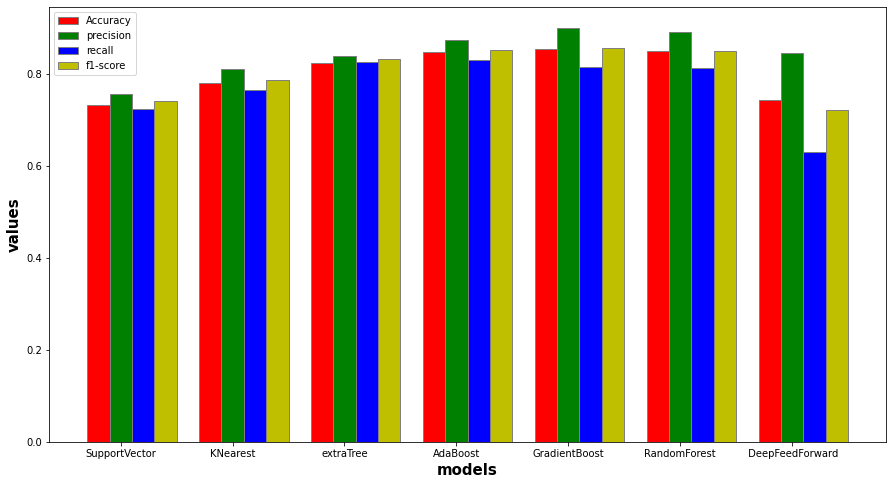

'plt.xlabel("models")\nplt.ylabel("Accuracy")\nplt.title("Accuracy comparsion of different models")\nplt.show()'

In [150]:
import numpy as np
import matplotlib.pyplot as plt
model_acc=[sa,ka,ea,aa,ga,ra,ma]
model_pre=[sp,kp,ep,ap,gp,rp,mp]
model_rec=[sr,kr,er,ar,gr,rr,mr]
model_f1=[sf,kf,ef,af,gf,rf,mf]

names=['SupportVector','KNearst','extraTree','AdaBoost','GradientBoost','RandomForest',' DeepFeedForward']
#fig = plt.figure(figsize = (10, 5))
#plt.bar(names,model,width = 0.4)
barWidth = 0.2
fig = plt.subplots(figsize =(15, 8))

br1 = np.arange(len(model_acc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, model_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy',Linewidth=1)
plt.bar(br2, model_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='precision',Linewidth=1)
plt.bar(br3, model_rec, color ='b', width = barWidth,
        edgecolor ='grey', label ='recall',Linewidth=1)
plt.bar(br4, model_f1, color ='y', width = barWidth,
        edgecolor ='grey', label ='f1-score',Linewidth=1)


plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(model_acc))],
        ['SupportVector','KNearest','extraTree','AdaBoost','GradientBoost','RandomForest',' DeepFeedForward'])

plt.legend()
plt.show()
'''plt.xlabel("models")
plt.ylabel("Accuracy")
plt.title("Accuracy comparsion of different models")
plt.show()'''

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

d = {'model_acc': [i for i in range(10)],
      'model_pre': [i * i for i in range(10)],
      'model_rec': [i * i for i in range(10)],
     'model_f1': [i * i for i in range(10)]
        }

df = pd.DataFrame(d)
df.plot(kind='bar', edgecolor='white', linewidth=1)

plt.legend(loc="upper left")
plt.show()

In [ ]:
data1['Result']  = [0 if result in ['Pass', 'Distinction'] else 1 for result in data1['final_result']]

In [ ]:
feature = data.drop(['final_result', 'Result'], axis = 1)
target  = data['Result']

In [ ]:
target.value_counts()

In [ ]:
target_name=["Pass","Fail"]


x_train, x_test, y_train, y_test = train_test_split(feature, target,test_size = 0.2,random_state = 123,stratify=data.final_result)

In [ ]:
model_svm=SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
model_knn=KNN()
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
model_etc=ETC()
model_etc.fit(x_train,y_train)
y_pred = model_etc.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
model_abc=ABC()
model_abc.fit(x_train,y_train)
y_pred = model_abc.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
model_gbc=GBC()                                                   
model_gbc.fit(x_train,y_train)
y_pred = model_gbc.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
model_rfc=RFC()
model_rfc.fit(x_train,y_train)
y_pred = model_rfc.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))

In [ ]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes=(15,))
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [ ]:
print(classification_report(y_test,y_pred,target_names=target_name,digits=4))
print("Sensitivity:",sensitivity(tn,fp,fn,tp))
print("Specificity:",specificity(tn,fp,fn,tp))